# Описание данных

- **_PassengerId_**: Уникальный ID 
- **_Pclass_**: Класс каюты пассажира
- **_Name_**: Имя пассажира (удалён во время предобработки данных)
- **_Sex_**: Пол пассажира
- **_Age_**: Возраст пассажира
- **_SibSp_**: Количество братьев, сестер или супругов пассажира, которые находились с ним на борту
- **_Parch_**: Количество родителей или детей, которые находились с пассажиром на борту
- **_Ticket_**: Номер билета (удалён во время предобработки данных)
- **_Fare_**: Стоимость билета
- **_Cabin_**: Номер каюты пассажира (удалён во время предобработки данных)
- **_Embarked_**: Порт, в который пассажир сел на борт
- **_Survived_**: Выжил пассажир или нет (**_Target_**)

# Загрузка библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize' : (7, 5)})
sns.color_palette("pastel")
sns.set_style("ticks") 

# EDA

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Сразу можно отметить, что в наборе данных присутствуют категориальные признаки, такие как "Pclass", "Sex" и "Embarked". 

## Пропущенные значения

In [6]:
train_df.isnull().sum() / len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Только 3 признака имеют пропущенные значения:
- _Age_ - почти 20%
- _Cabin_ - чуть больше 70%
- _Embarked_ - меньше 1%

In [7]:
test_df.isnull().sum() / len(test_df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Только 3 признака имеют пропущенные значения:
- _Age_ - чуть больше 20%
- _Fare_ - меньше 1%
- _Cabin_ - чуть больше 75%

Возраст, вероятно, является важным признаком, поэтому просто удалить его нельзя. Что бы заполнить пропущенные значения я воспользуюсь средним значением по признаку.

В то же время, номер каюты пассажира имеет примерно 77% пропущенных значений и для тренировочного и для тестового набора данных. Маловероятно, что при таком кол-ве пропущенных значений, с его помощью можно получить какую-то репрезентативную информацию. Этот признак можно удалить.

Признак _Embarked_ или порт, в который пассажир сел на борт, является категориальным и может принимать только 3 значения. К тому же кол-во пропущенных значений крайне мало. Было бы неразумно не заполнить их с помощью моды.

Стоимость билета так же имеет мало пропущенных значений и они могут быть заполнены средним.

### Заполнение пропущенных значений, удаление ненужных признаков

In [8]:
values = {'Age' : train_df.Age.mean(),
          'Embarked' : train_df.Embarked.mode()[0],
          'Fare' : train_df.Fare.mean()}

In [9]:
train_df.fillna(value=values, inplace=True)
test_df.fillna(value=values, inplace=True)

In [10]:
submission = pd.DataFrame(test_df['PassengerId'])

Сохраняю id пассажиров для создания файла с прогнозом.

In [11]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

Признаки Name и Ticket являются уникальными для каждого пассажира, значит не несут в себе какой либо полезной информации. Про признак Cabin я писал ранее.

### Количество уникальных значений признаков

In [12]:
train_df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

### Типы данных признаков

In [13]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### Основные статистики о пассажирах корабля

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


### Столбчатая диаграмма целевого признака

C:\Users\MrDin\AppData\Local\Temp\ipykernel_13148\1346811174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df,


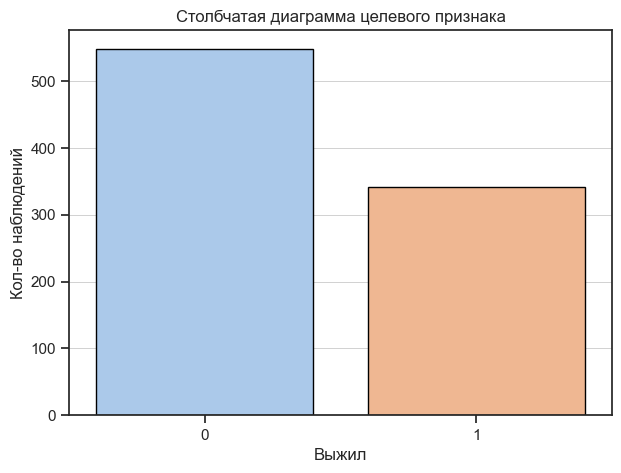

In [15]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака')
plt.show()

Похоже в наборе данных присутствует небольшой дисбаланс классов.

### Столбчатая диаграмма целевого признака в зависимости от пола

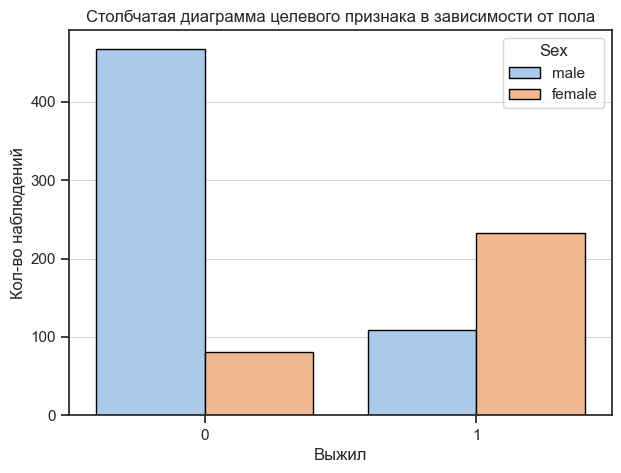

In [16]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Sex',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от пола')
plt.show()

1. В наборе данных больше мужчин чем женщин
2. Несмотря на то, что женщин меньше, их выжило больше, чем мужчин
3. Выжило около 75% женщин и 19% мужчин

### Столбчатая диаграмма целевого признака в зависимости от класса каюты

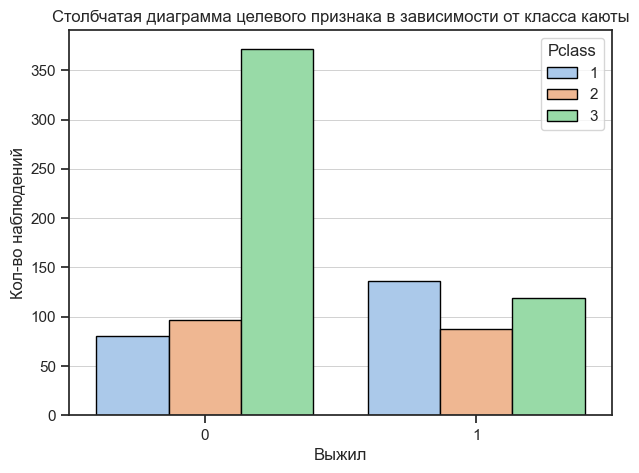

In [17]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Pclass',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от класса каюты')
plt.show()

1. Большинство пассажиров имеют каюты 3 класса и большинство из них не выжило
2. Большая половины пассажиров 1 класса выжило

### Столбчатая диаграмма целевого признака в зависимости от порта посадки

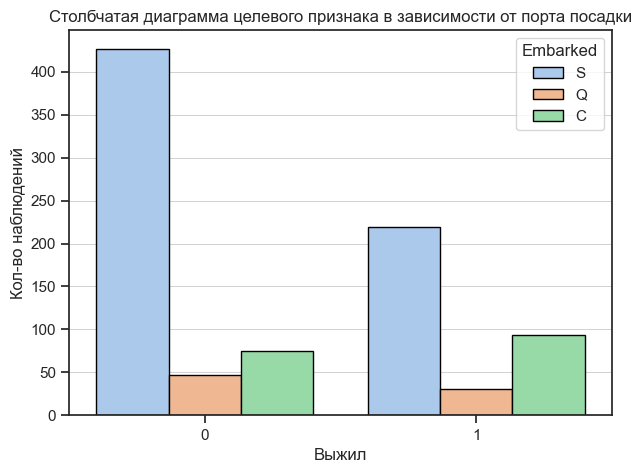

In [18]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Embarked',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от порта посадки')
plt.show()

1. Большая часть пассажиров села на корабль в Саутгемптоне(S) и большая часть этих пассажиров не выжила
2. Среди тех, кто сел на корабль в Шербуре(C), выживших больше, чем погибших

### Распределение возраста в зависимости от пола и целевого признака

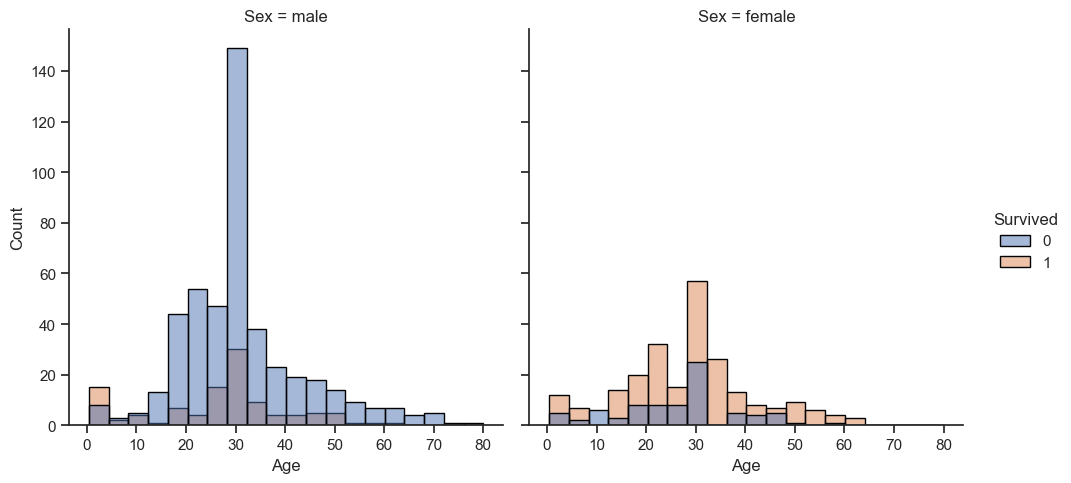

In [19]:
sns.displot(train_df,
           x = 'Age',
           col = 'Sex',
           hue = 'Survived',
           bins= 20,
           edgecolor='black')
plt.show()

In [20]:
train_df.groupby(['Survived', 'Sex']).count()

Pclass  Age  SibSp  Parch  Fare  Embarked
Survived Sex                                              
0        female      81   81     81     81    81        81
         male       468  468    468    468   468       468
1        female     233  233    233    233   233       233
         male       109  109    109    109   109       109

In [21]:
train_df.groupby(['Survived', 'Sex']).mean(numeric_only=True)['Age']

Survived  Sex   
0         female    26.023272
          male      31.175224
1         female    28.979263
          male      27.631705
Name: Age, dtype: float64

1. Большинство мужчин среди всех возрастов не выжило
2. Большниство женщин, среди всех возрастов выжило
3. В наборе данных большинство пассажиров в возрасте примерно от 20 до 35 лет
4. Средний возраст мужчин и женщин примерно одинаков

### Распределение цены билета в зависимости от целевого признака

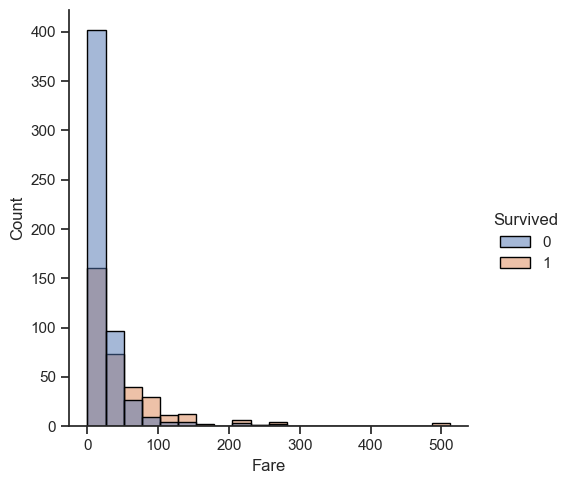

In [22]:
sns.displot(train_df,
           x = train_df['Fare'],
           hue = 'Survived',
           bins= 20,
           edgecolor='black')
plt.show()

1. Большинство наблюдений сконцентрированы вблизи нуля
2. Видно, что при более высокой цене билета, кол-во выживших превышает кол-во погибших

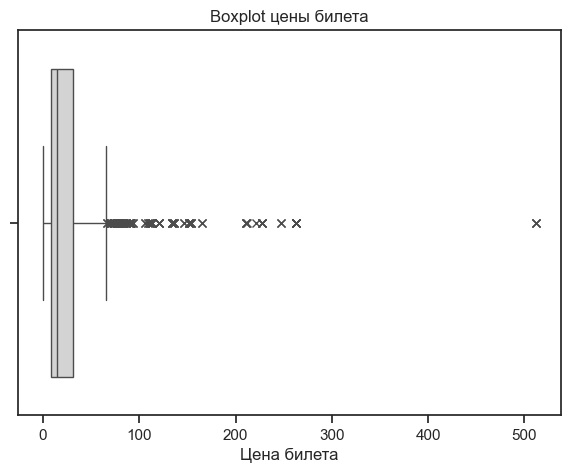

In [23]:
sns.boxplot(x=train_df['Fare'], flierprops={"marker": "x"}, boxprops={"facecolor": 'lightgrey'})
plt.xlabel('Цена билета')
plt.title('Boxplot цены билета')
plt.show()

Присутствуют значительные отклонения от медианы. Есть много наблюдений, где цена билета > 75 и несколько, где цена > 200.

### Столбчатая диаграмма целевого признака в зависимости от новой переменной IsAlone

Искусственно сгенерирую переменные Relatives и IsAlone, которые будут содержать информацию об общем числе родственников пассажира на корабле и путешествовал ли пассажир один или с кем то.

In [24]:
train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']
train_df.loc[train_df['Relatives'] > 0, 'IsAlone'] = 0
train_df.loc[train_df['Relatives'] == 0, 'IsAlone'] = 1

test_df['Relatives'] = test_df['SibSp'] + test_df['Parch']
test_df.loc[test_df['Relatives'] > 0, 'IsAlone'] = 0
test_df.loc[test_df['Relatives'] == 0, 'IsAlone'] = 1

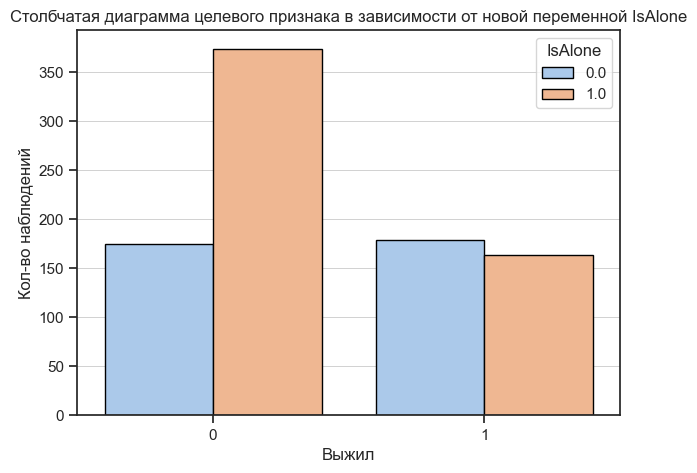

In [25]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='IsAlone',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от новой переменной IsAlone')
plt.show()

Похоже, что большинство пассажиров, путешествовавших в одиночку, не выжило. 

### Корреляционный анализ

Что бы увидеть зависимости между целевым признаком и категориальными в наборе даных, можно создать фиктивная переменные.

In [26]:
train_df = pd.get_dummies(data=train_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

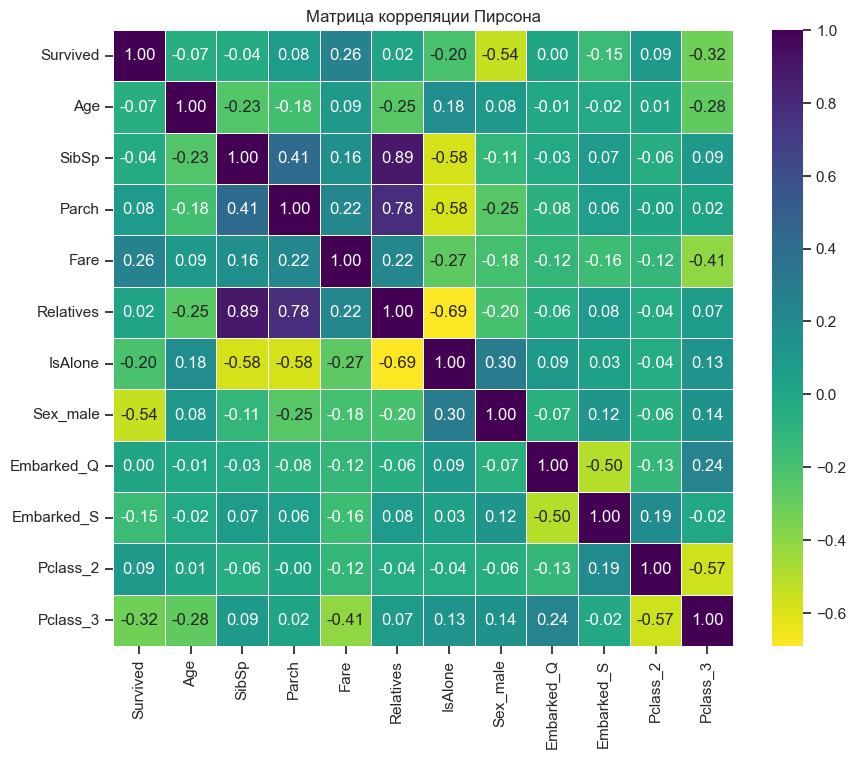

In [27]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции Пирсона')
plt.show()

1. Признаки _Age_, _SibSp_, _Parch_, _Relatives_, _Embarked_Q_, _Pclass_2_ не имеют почти никакой линейной связи с целевым признаком;
2. Признаки _Pclass_, _Fare_, _IsAlone_, _Emarked_C_, _Embarked_S_, _Pclass_3_ имеют слабую взаимосвязь с целевым признаком;
3. Признак _Sex_male_ имеет наиболее сильную взаимосвязь с целевым признаком;
4. Искусственно созданные признаки и фиктивные переменные имеют сильную взаимосвязь с независимыми переменными с помощью которых они создавались и друг с другом, что говорит о мультиколлинеарности в наборе данных;

## Сохранение данных

In [28]:
train_df.to_csv('data/preprocessed_data/preprocessed_train.csv', index=False)
test_df.to_csv('data/preprocessed_data/preprocessed_test.csv', index=False)
submission.to_csv('data/preprocessed_data/submission.csv', index=False)